In [3]:
from pymutspec.annotation import calculate_mutspec, rev_comp, transcriptor
from pymutspec.constants import possible_sbs192
import os
import sys
from collections import defaultdict
from functools import reduce, partial

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from pymutspec.draw import plot_mutspec12, plot_mutspec192 

In [4]:
color_mapping12 = {
    "C>A": "deepskyblue",
    "G>T": "deepskyblue",
    "C>G": "black",
    "G>C": "black",
    "C>T": "red",
    "G>A": "red",
    "T>A": "silver",
    "A>T": "silver",
    "T>C": "yellowgreen",
    "A>G": "yellowgreen",
    "T>G": "pink",
    "A>C": "pink",
}
sbs12_ordered = ["C>A", "G>T", "C>G", "G>C", "C>T", "G>A", "T>A", "A>T", "T>C", "A>G", "T>G", "A>C"]
colors12 = [color_mapping12[sbs] for sbs in sbs12_ordered]


kk_lbls = "A>C A>G A>T C>T G>C G>T".split()
cosmic_lbls = "C>A C>G C>T T>A T>C T>G".split()

df = pd.DataFrame({"sbs": possible_sbs192})
df["sbs_base"] = df["sbs"].str.slice(2, 5)
df["sbs_base_revcomp"] = df["sbs_base"].str.translate(transcriptor)
df["sbs_revcomp"] = df["sbs"].apply(rev_comp)
df["is_cosmic"] = df["sbs_base"].isin(cosmic_lbls)
df["is_kk"] = df["sbs_base"].isin(kk_lbls)
df["sbs_base_for_sorting_kp"] = df.apply(
    lambda x: x.sbs_base + "1" if x.is_cosmic else x.sbs_base_revcomp + "2", axis=1)
df["sbs_for_ordering_kk"] = df.apply(lambda x: x.sbs if x.is_kk else x.sbs_revcomp, axis=1)
df["sbs_for_ordering_kp"] = df.apply(lambda x: x.sbs if x.is_cosmic else x.sbs_revcomp, axis=1)

ordered_sbs192_kp = list(df.sort_values(["sbs_base_for_sorting_kp", "sbs_for_ordering_kp"]).sbs.values)
ordered_sbs192_kk = list(df.sort_values(["sbs_base", "sbs_for_ordering_kk"]).sbs.values)
del df


def __prepare_nice_labels(ordered_sbs192):
    _nice_order = []
    prev = None
    for sbs in ordered_sbs192:
        if prev is not None and sbs[2:5] != prev[2:5]:
            _nice_order.append("")
        # _nice_order.append(sbs[2] + sbs[4] + ": " + sbs[0] + sbs[2] + sbs[-1])
        _nice_order.append(sbs)
        prev = sbs
    return _nice_order

In [5]:
path_to_substract12 = "../data/exposure/human_cytb/ms/ms12syn.tsv"
path_to_substract192 = "../data/exposure/human_cytb/ms/ms192syn.tsv"

substract12 = pd.read_csv(path_to_substract12, sep="\t")
substract192 = pd.read_csv(path_to_substract192, sep="\t")


In [7]:
ms12 = pd.read_csv("../data/exposure/human_cytb/pyvolve/out/ms12syn_debug.tsv", sep="\t")
# ms192 = pd.read_csv("../data/exposure/human_cytb/pyvolve/out/ms192syn_debug.tsv", sep="\t")
ms192 = pd.read_csv("../data/tmp/cytb_ms192.tsv", sep="\t")

In [8]:
df12 = ms12.merge(substract12[["Mut", "MutSpec"]], on="Mut").rename(columns={"MutSpec_y": "MutSpec_obs", "MutSpec_x": "MutSpec_exp"})
df12["MutSpec"] = df12["MutSpec_obs"] - df12["MutSpec_exp"]

df192 = ms192.merge(substract192[["Mut", "MutSpec"]], on="Mut").rename(columns={"MutSpec_y": "MutSpec_obs", "MutSpec_x": "MutSpec_exp"})
df192["MutSpec"] = df192["MutSpec_obs"] - df192["MutSpec_exp"]

In [38]:
df192

,Mut,ObsNum,ExpNum,MutSpec_exp,MutSpec_obs,MutSpec
0,A[T>C]T,1,2.000000,0.259105,0.0,-0.259105
1,A[T>C]T,0,2.000000,0.000000,0.0,0.000000
2,A[T>C]T,0,2.000000,0.000000,0.0,0.000000
3,A[T>C]T,0,2.000000,0.000000,0.0,0.000000
4,A[T>C]T,0,2.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...
38395,G[T>A]A,0,1.038961,0.000000,0.0,0.000000
38396,G[T>A]A,0,1.038961,0.000000,0.0,0.000000
38397,G[T>A]A,0,1.038961,0.000000,0.0,0.000000
38398,G[T>A]A,0,1.038961,0.000000,0.0,0.000000


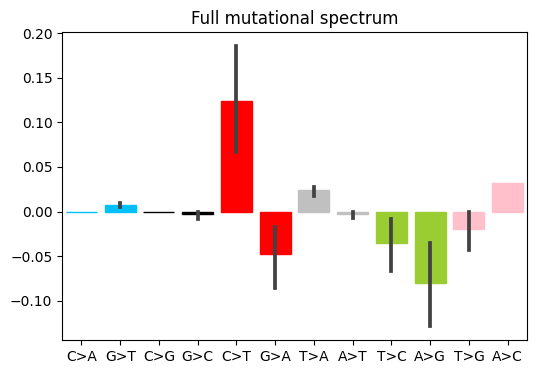

<AxesSubplot:title={'center':'Full mutational spectrum'}>

In [5]:
plot_mutspec12(df12)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


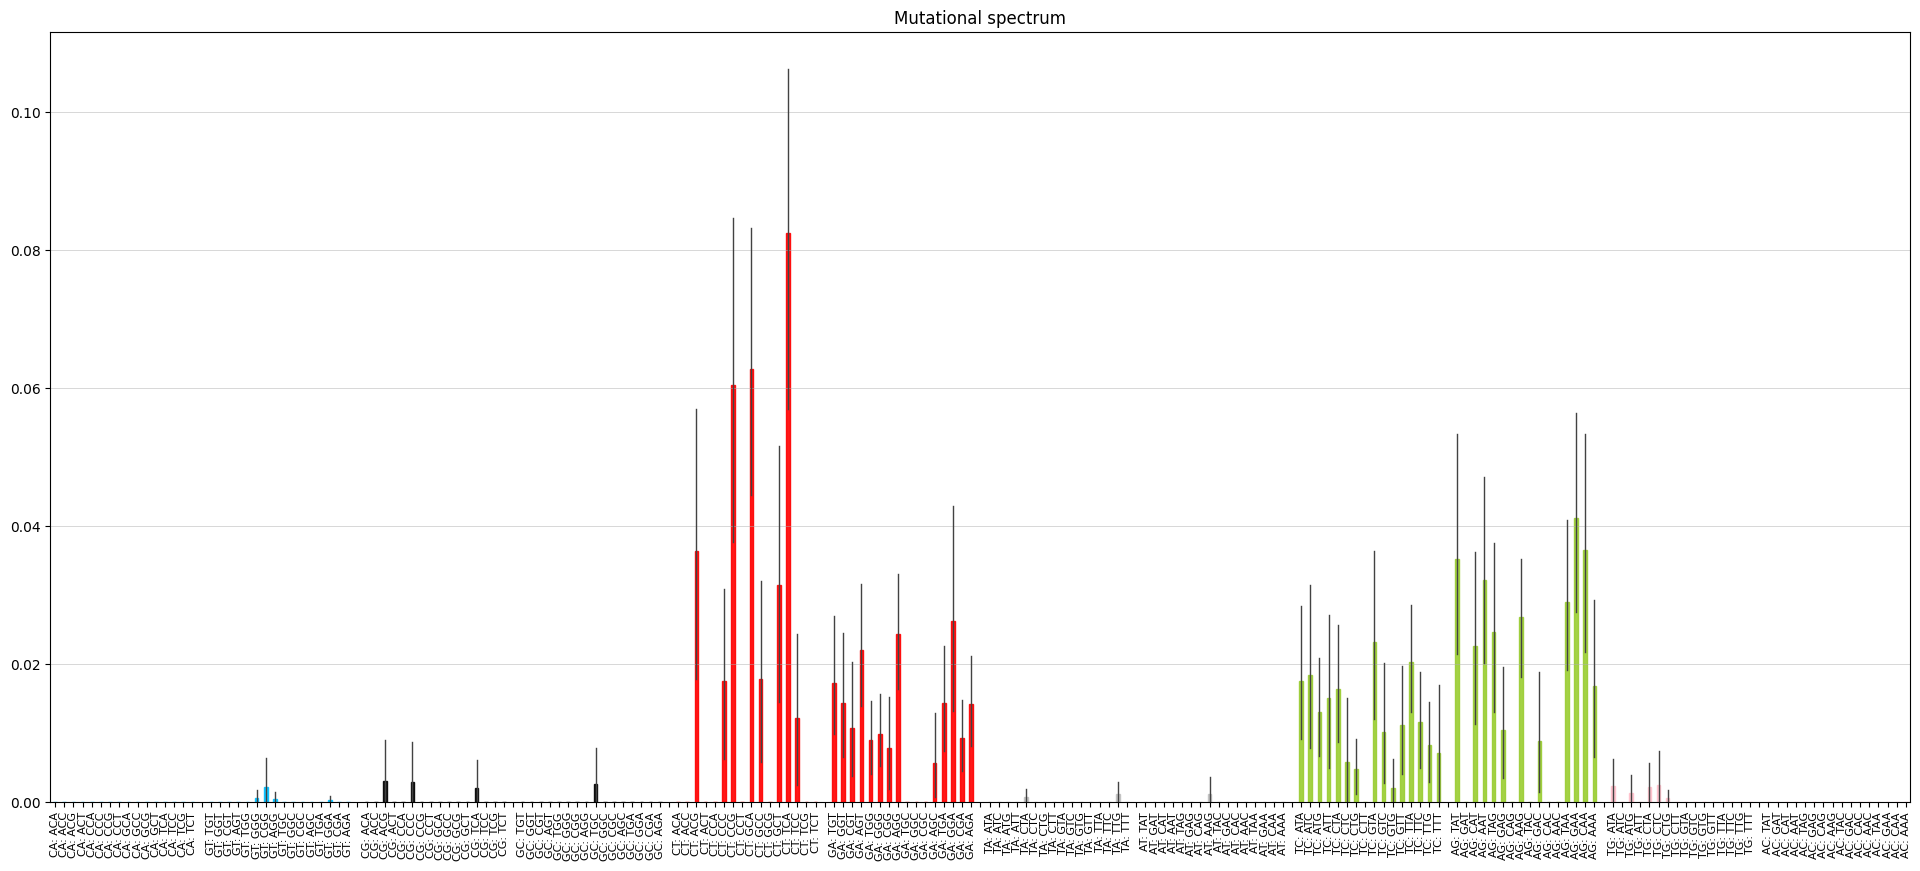

In [10]:
plot_mutspec192(ms192)

In [16]:
df192[df192.Mut.str.slice(2, 5) == "C>T"]

,Mut,ObsNum,ExpNum,MutSpec_exp,MutSpec_obs,MutSpec
6400,T[C>T]T,0,0.0,0.0,0.0,0.0
6401,T[C>T]T,0,0.0,0.0,0.0,0.0
6402,T[C>T]T,0,0.0,0.0,0.0,0.0
6403,T[C>T]T,0,0.0,0.0,0.0,0.0
6404,T[C>T]T,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
37395,G[C>T]G,0,0.0,0.0,0.0,0.0
37396,G[C>T]G,0,0.0,0.0,0.0,0.0
37397,G[C>T]G,0,0.0,0.0,0.0,0.0
37398,G[C>T]G,0,0.0,0.0,0.0,0.0


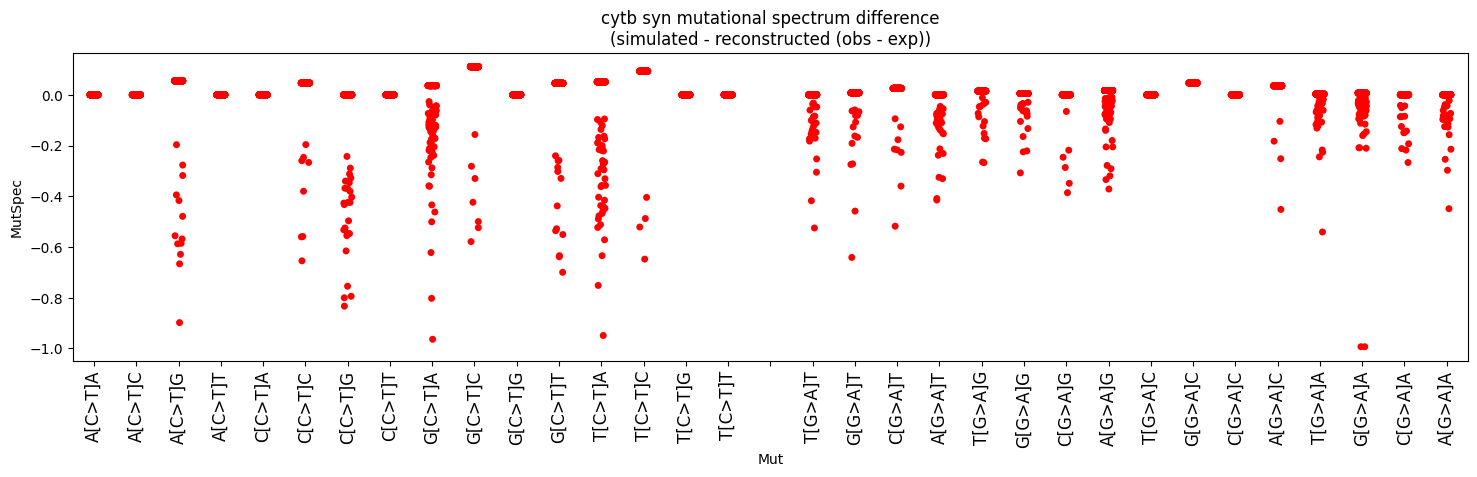

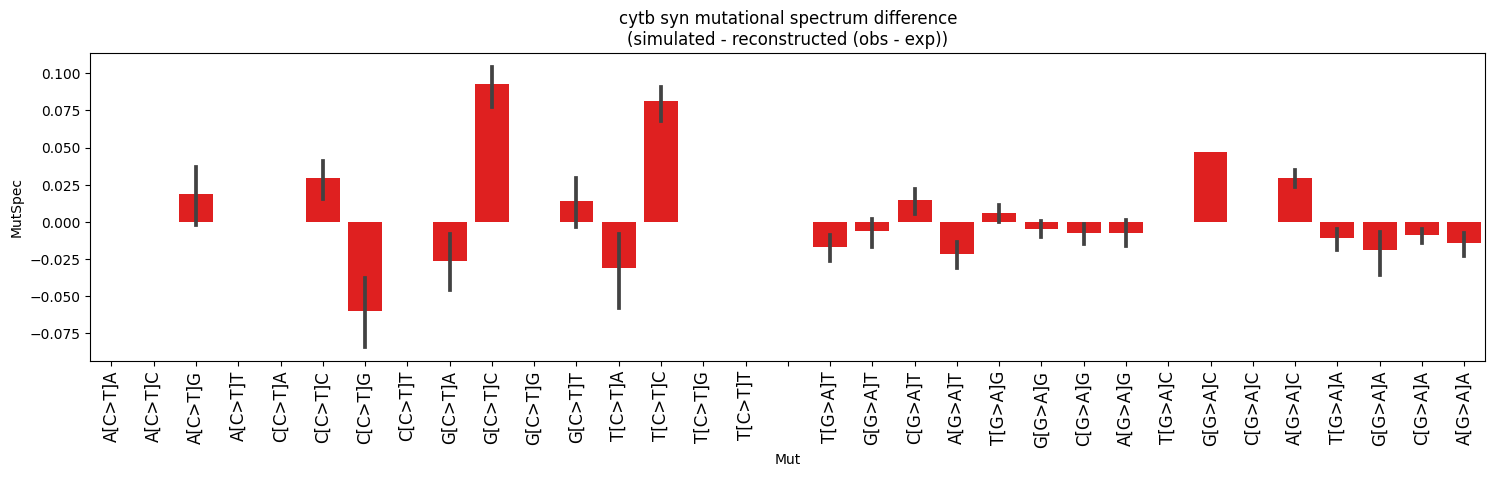

In [37]:
d = df192[(df192.MutSpec != -10) & (df192.Mut.str.slice(2, 5).isin(["C>T", "G>A"]))]
orderrr = [x for x in ordered_sbs192_kp if "C>T" in x] + [""] + [x for x in ordered_sbs192_kp if "G>A" in x]

plt.figure(figsize=(18, 4))
sns.stripplot(data=d, x="Mut", y="MutSpec", order=orderrr, color="red")
plt.title("cytb syn mutational spectrum difference\n(simulated - reconstructed (obs - exp))")
plt.xticks(rotation=90, fontsize=12)
plt.show()
plt.figure(figsize=(18, 4))
sns.barplot(data=d, x="Mut", y="MutSpec", order=orderrr, color="red")
plt.title("cytb syn mutational spectrum difference\n(simulated - reconstructed (obs - exp))")
plt.xticks(rotation=90, fontsize=12)
plt.show()

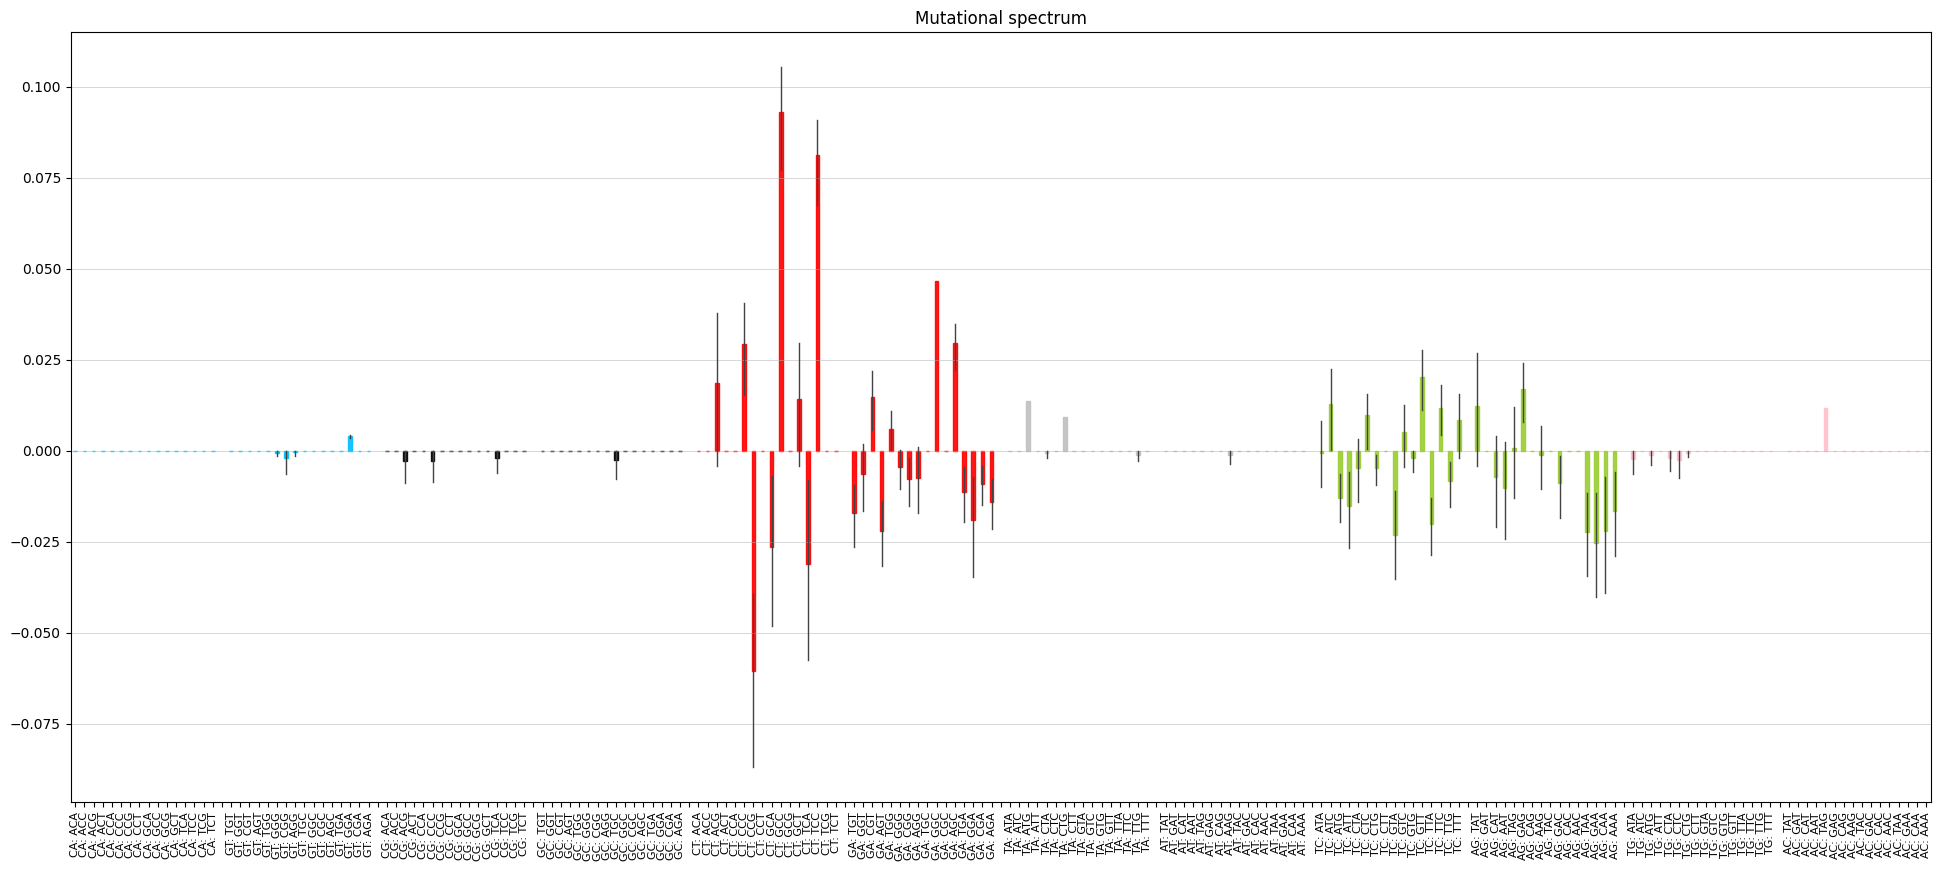

In [11]:
plot_mutspec192(df192)

In [13]:
df192[df192.Mut == "A[T>A]G"]

,Mut,ObsNum,ExpNum,MutSpec_exp,MutSpec_obs,MutSpec
7900,A[T>A]G,0,4.012987,0.0,0.013537,0.013537
7901,A[T>A]G,0,4.012987,0.0,0.013537,0.013537
7902,A[T>A]G,0,4.012987,0.0,0.013537,0.013537
7903,A[T>A]G,0,4.012987,0.0,0.013537,0.013537
7904,A[T>A]G,0,4.012987,0.0,0.013537,0.013537
...,...,...,...,...,...,...
7995,A[T>A]G,0,4.012987,0.0,0.013537,0.013537
7996,A[T>A]G,0,4.012987,0.0,0.013537,0.013537
7997,A[T>A]G,0,4.012987,0.0,0.013537,0.013537
7998,A[T>A]G,0,4.012987,0.0,0.013537,0.013537


In [15]:
a = df192.groupby("Mut").MutSpec.agg([np.mean, np.std]).sort_values(["mean", "std"])

In [7]:
ms192.groupby("Mut").ObsNum.sum().sort_values()

Mut
A[A>C]A     0
G[C>A]C     0
G[C>A]G     0
G[C>A]T     0
G[C>G]A     0
           ..
G[G>A]A    25
A[A>G]T    26
C[A>G]A    27
G[A>G]A    28
G[C>T]A    31
Name: ObsNum, Length: 192, dtype: int64

In [72]:
def plot_mutspec12box(mutspec: pd.DataFrame, ylabel="MutSpec", title="Full mutational spectrum", show=True, savepath=None):
    for sbs in set(sbs12_ordered).difference(mutspec.Mut.unique()):
        # mutspec = mutspec.append({"Mut": sbs, "MutSpec": 0.}, ignore_index=True)
        mutspec = pd.concat([mutspec, pd.DataFrame([{"Mut": sbs, "MutSpec": 0.}])], ignore_index=True)

    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(111)
    ax = sns.boxplot(x="Mut", y=ylabel, data=mutspec, order=sbs12_ordered, ax=fig.gca())

    # map colors to bars
    for bar, clr in zip(ax.patches, colors12):
        bar.set_color(clr)

    ax.set_title(title)
    ax.set_ylabel("")
    ax.set_xlabel("")

    if savepath is not None:
        plt.savefig(savepath)
    if show:
        plt.show()
    else:
        plt.close()
    return ax

In [82]:
df12.shape

(1200, 6)

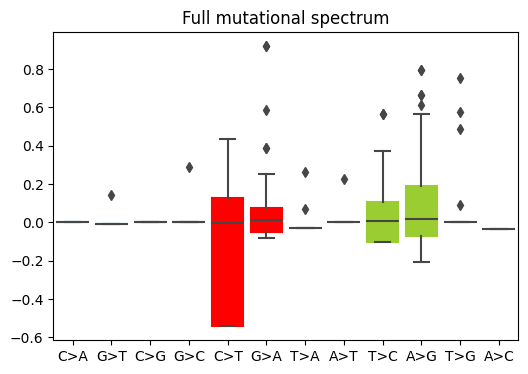

<AxesSubplot:title={'center':'Full mutational spectrum'}>

In [87]:
plot_mutspec12box(df12)

<AxesSubplot:>

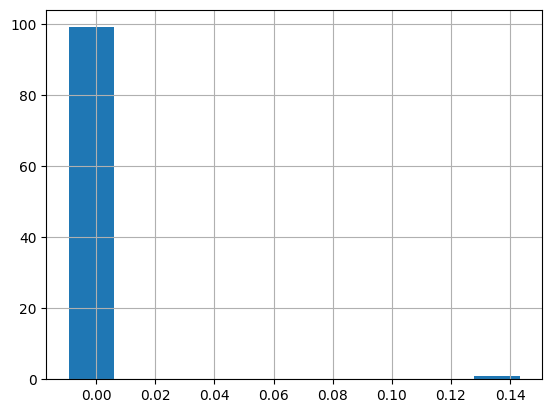

In [78]:
df12[df12.Mut == "G>T"].MutSpec.hist()

In [24]:
def plot_mutspec192(mutspec192: pd.DataFrame, ylabel="MutSpec", title="Mutational spectrum", show=True, figsize=(24, 10), filepath=None):
    """
    Plot barblot of given mutational spectrum calculated from single nucleotide substitutions

    Arguments
    ---------
    mutspec192: pd.DataFrame
        table, containing 192 component mutational spectrum for one or many species, all substitutions must be presented in the table
    title: str, default = 'Mutational spectrum'
        Title on the plot
    filepath: str, default = None
        Path to output plot file. If None no images will be written
    """
    # TODO add checks of mutspec192
    ms192 = mutspec192.copy()
    ms192["MutBase"] = ms192.Mut.str.slice(2, 5)
    ms192["Context"] = ms192.Mut.str.get(0) + ms192.Mut.str.get(2) + ms192.Mut.str.get(-1)
    ms192["long_lbl"] = ms192.Mut.str.get(2) + ms192.Mut.str.get(4) + ": " + \
        ms192.Mut.str.get(0) + ms192.Mut.str.get(2) + ms192.Mut.str.get(-1)
    order = __prepare_nice_labels(ordered_sbs192_kp)

    # df = ms192.groupby(["MutBase", "Context"]).mean()
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.grid(axis="y", alpha=.7, linewidth=0.5)
    sns.boxplot(
        x="Mut", y=ylabel, data=ms192,
        order=order, ax=fig.gca(),
    )
    ax.set_title(title)
    ax.set_xlabel("")
    ax.set_ylabel("")
    # map colors to bars
    width = 0.4
    shift = None
    for bar, sbs in zip(ax.patches, order):
        # if not shift:
        #     shift = (bar.get_width() - width) / 2
        if len(sbs):
            bar.set_color(color_mapping12[sbs[2:5]])
            bar.set_alpha(alpha=0.9)
        # bar.set_width(width)
        # bar.set_x(bar.get_x() + shift)

    plt.xticks(rotation=90, fontsize=6)
    # labels = ['' for _ in ax.get_xticklabels()]
    # ax.set_xticklabels(labels)
    # __label_group_bar_table(ax, df)
    # fig.subplots_adjust(bottom=0.1 * df.index.nlevels)
    if filepath is not None:
        plt.savefig(filepath)
    if show:
        plt.show()
    else:
        plt.close()

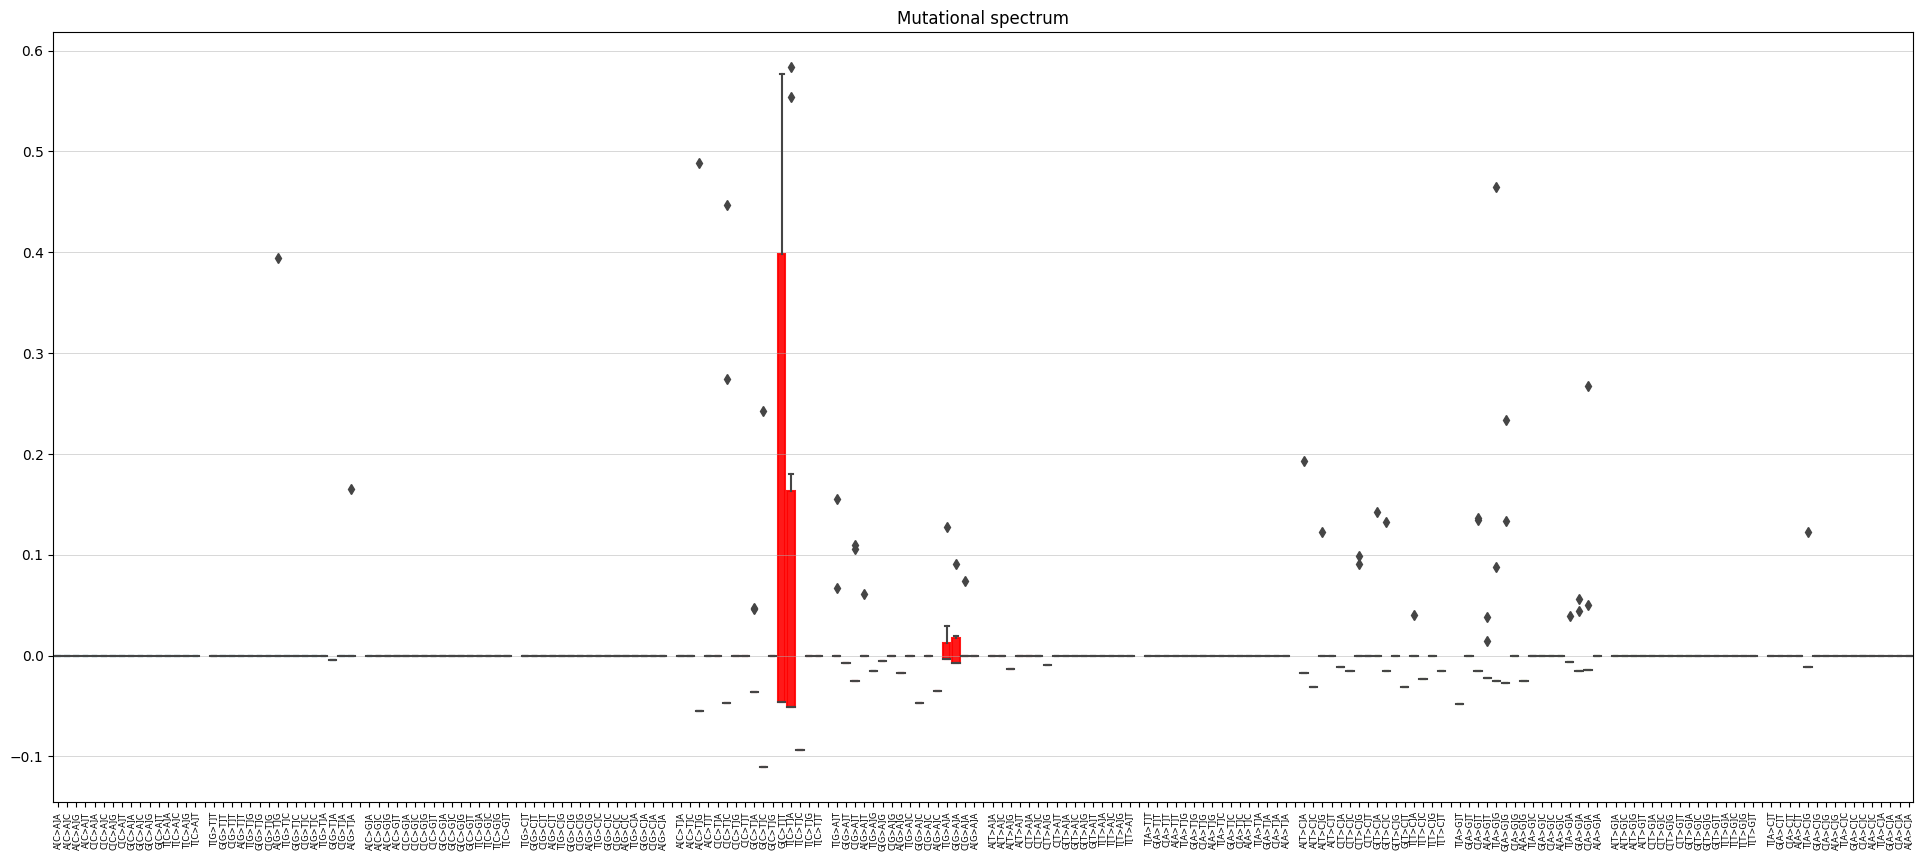

In [25]:
plot_mutspec192(df192)

In [35]:
import pyvolve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
path_to_mulal = "../data/exposure/human_cytb/pyvolve/mulal.fasta_sample.clean"
codon_freqs = pyvolve.ReadFrequencies("codon", file=path_to_mulal, gencode=2, columns=[1, 7, 13]).compute_frequencies(type="codon")
G = pyvolve.Genetics(2)

a = pd.Series(dict(zip(G.codons, codon_freqs)))
a[a>0]

ACT    0.333333
ATG    0.333333
CTA    0.142857
TTA    0.190476
dtype: float64

In [26]:
10 / (7 * 14)

0.10204081632653061

In [51]:
seq = "atggtagctagct"
for i in range(0, len(seq), 3):
    print(seq[i:i+3])

atg
gta
gct
agc
t


In [45]:
len(a) - len(a)%3

12

In [48]:
a = [0,1,0,1,1,1,0,0,0,1,1,1,0]

np.where(np.reshape(a[:len(a) - len(a)%3], (-1, 3)).sum(axis=1) > 0)

(array([0, 1, 3]),)

In [ ]:
>RN_208
ATG ACC CCA ATA CGC AAA ACT AAC CCC CTA ATA AAA CTA ATT
>RN_483
ATG ACC CCA ATA CGC AAA ACT AAC CCC CTA ATA AAA TTA ATT
>RN_387
ATG ACC CCA ATA CGC AAA ACT AAC CCC CTA ATA AAA TTA ATT
>RN_269
ATG ACC CCA ATA CGC AAA ACT AAC CCC CTA ATA AAA CTA ATT
>RN_228
ATG ACC CCA ATA CGC AAA ACT AAC CCC CTA ATA AAA TTA ATT
>RN_326
ATG ACC CCA ATA CGC AAA ACT AAC CCC CTA ATA AAA TTA ATT
>RN_204
ATG ACC CCA ATA CGC AAA ACT AAC CCC CTA ATA AAA CTA ATT

14 codons
7 seqs